Group 19: Fernando Trias, Roger Iliffe, HyounJun Park, Siyuan Yin

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Loan Data

Before loading this data, you must create the "bz2" files by running the Data_cleansing notebook.

In [2]:
public_data_cat = pd.read_pickle("analysis-predictors.bz2")
public_data_y = pd.read_pickle("analysis-target.bz2")

In [3]:
public_data_cat = public_data_cat.drop('issue_date',axis=1)

In [4]:
public_data_y.mean()

-0.0239263066826214

## Create Design Matrix

We created two design matrices. One for training and testing on the entire testing set. Another for training and testing on a random sample so that our experiments could run faster.

#### Model Split on subset of data set

In [5]:
X_sub, y_sub = resample(public_data_cat, public_data_y, n_samples=10000)
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    X_sub, y_sub, test_size=0.25, random_state=42)

#### Model Split on entire data set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    public_data_cat, public_data_y, test_size=0.25, random_state=42)

## Scaling

We experimented with the scaling method, StandardScaler.

#### StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_train_scale = pd.DataFrame(data = scale.transform(X_train), columns = X_train.columns.tolist())
X_test_scale = pd.DataFrame(data = scale.transform(X_test), columns = X_test.columns.tolist())

In [9]:
# create a subset of test data
X_train_sub_scale = pd.DataFrame(data = scale.transform(X_train_sub), columns = X_train.columns.tolist())
X_test_sub_scale = pd.DataFrame(data = scale.transform(X_test_sub), columns = X_test.columns.tolist())

In [10]:
y_train.describe()

count    739330.000000
mean         -0.023918
std           0.283187
min          -1.000000
25%           0.040477
50%           0.073132
75%           0.108923
max           0.982541
Name: apy, dtype: float64

In [11]:
X_test_scale.describe()

,loan_amnt,term_months,int_rate,credit_score,emp_length_years,annual_inc,dti,delinq_2yrs,credit_history_years,inq_last_6mths,...,total_acc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
count,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,...,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000,246444.000000
mean,0.002492,0.000873,0.003489,0.003658,-0.000443,0.003085,0.002265,0.001378,-0.001509,0.003561,...,-0.002733,-0.000365,-0.000125,0.000487,0.002716,-0.002486,0.002673,0.003240,0.001082,0.001691
std,1.000531,1.000533,1.001566,1.002071,0.999455,1.226673,0.953216,0.998851,0.999830,1.004971,...,1.000046,0.999842,0.999971,1.000187,1.112239,0.999987,1.185844,1.130124,1.001417,1.000348
min,-1.621322,-0.561624,-1.722283,-1.669946,-1.462000,-1.214605,-1.879250,-0.360744,-2.132729,-0.713918,...,-1.944951,-0.654167,-0.779051,-0.690128,-0.011455,-0.995315,-0.006579,-0.011689,-0.338276,-0.815402
25%,-0.744073,-0.561624,-0.717991,-0.746343,-0.882563,-0.490418,-0.653453,-0.360744,-0.683532,-0.713918,...,-0.691202,-0.654167,-0.779051,-0.690128,-0.011455,-0.995315,-0.006579,-0.011689,-0.338276,-0.815402
50%,-0.276208,-0.561624,-0.074215,-0.130607,0.002234,-0.168556,-0.052510,-0.360744,-0.181789,-0.713918,...,-0.106119,-0.654167,-0.779051,-0.690128,-0.011455,-0.995315,-0.006579,-0.011689,-0.338276,-0.815402
75%,0.659524,-0.561624,0.614626,0.639062,1.145464,0.233770,0.602496,-0.360744,0.508933,0.322344,...,0.562548,1.528662,1.283612,1.449006,-0.011455,1.004707,-0.006579,-0.011689,-0.338276,1.226389
max,2.998853,1.780551,3.788445,3.563806,1.145464,152.039127,101.986036,29.485919,7.331183,7.576176,...,12.598543,1.528662,1.283612,1.449006,87.298103,1.004707,151.996916,85.551733,2.956166,1.226389


In [12]:
y_test.describe()

count    246444.000000
mean         -0.023950
std           0.282922
min          -1.000000
25%           0.040477
50%           0.073039
75%           0.108996
max           0.641484
Name: apy, dtype: float64

# Exploratory Models

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scale, y_train)

In [14]:
model.score(X_train_scale, y_train)

0.03254129937521988

In [15]:
model.score(X_test_scale, y_test)

model.coef_

array([-6.38064695e-03, -1.62106034e-02,  2.52067500e-02, -4.91283083e-02,
        2.74099218e-03,  3.25197428e-03, -1.74467720e-02, -3.89975006e-03,
        3.96122768e-03, -4.21146722e-03,  8.26137674e-04, -1.76109206e-03,
       -1.08739979e-02, -2.12420579e-03,  2.67522599e-03,  2.33718308e-03,
        1.14442416e-02,  9.76098938e+10,  1.03296389e+11,  9.96037206e+10,
       -8.27240725e+08, -3.61126128e+10, -4.75160271e+08, -8.44122645e+08,
       -2.19235969e+10, -3.53738562e+10])

In [16]:
#
# Draw a bar chart showing each coefficient's magnitude and direction
#
def graph_coef(model, columns):
    cf = dict(zip(columns, model.coef_.flatten()))
    data = sorted(cf.items(),key=lambda x:abs(x[1]))
#     print(data)
    data_order, data_values = zip(*data)
    data_order = np.array(data_order)
    data_values = np.array(data_values)
    index = np.arange(len(data_order))
    
    fig,ax = plt.subplots(1,1, figsize=(10,30))

    colors = np.array([(1,0,0)]*len(data_values))
    colors[data_values >= 0] = (0,0,1)

    ax.barh(index,abs(data_values),color = colors, alpha=0.8)
    ax.set_yticklabels(data_order)
    ax.set_yticks(index)
    plt.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title("Magnitude of coefficient", fontsize=20)
    ax.set_ylabel("predictors")
    ax.set_xlabel("magnitude");

Drawing a graph of each coefficient's magnitude and direction will help us to understand what factors the model considers to be significant. Red means a negative coefficient. Blue is a positive coefficient.

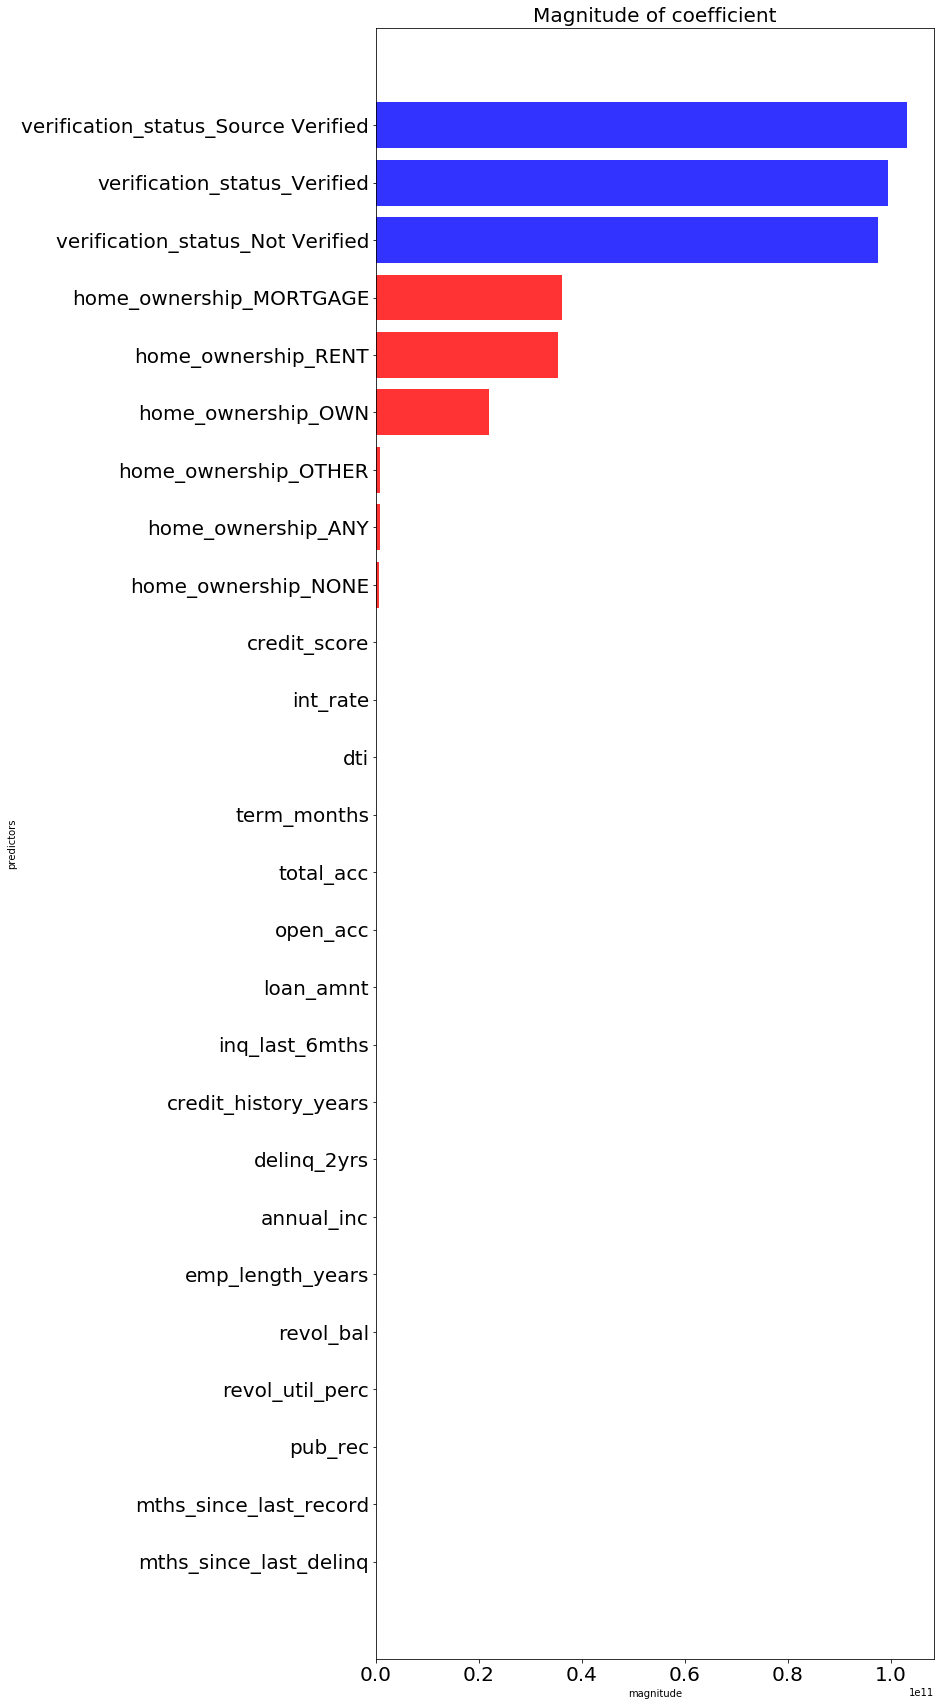

In [17]:
graph_coef(model, X_test_scale.columns)

## Lasso

In [18]:
from sklearn.linear_model import LassoCV
LassoCVobject = LassoCV()
LassoCVobject.fit(X_train_scale, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [19]:
LassoCVobject.score(X_train_scale, y_train)

0.03253995035026058

In [20]:
LassoCVobject.score(X_test_scale, y_test)

0.033842239263917495

In [21]:
np.mean(LassoCVobject.predict(X_test_scale))

-0.024146723680368885

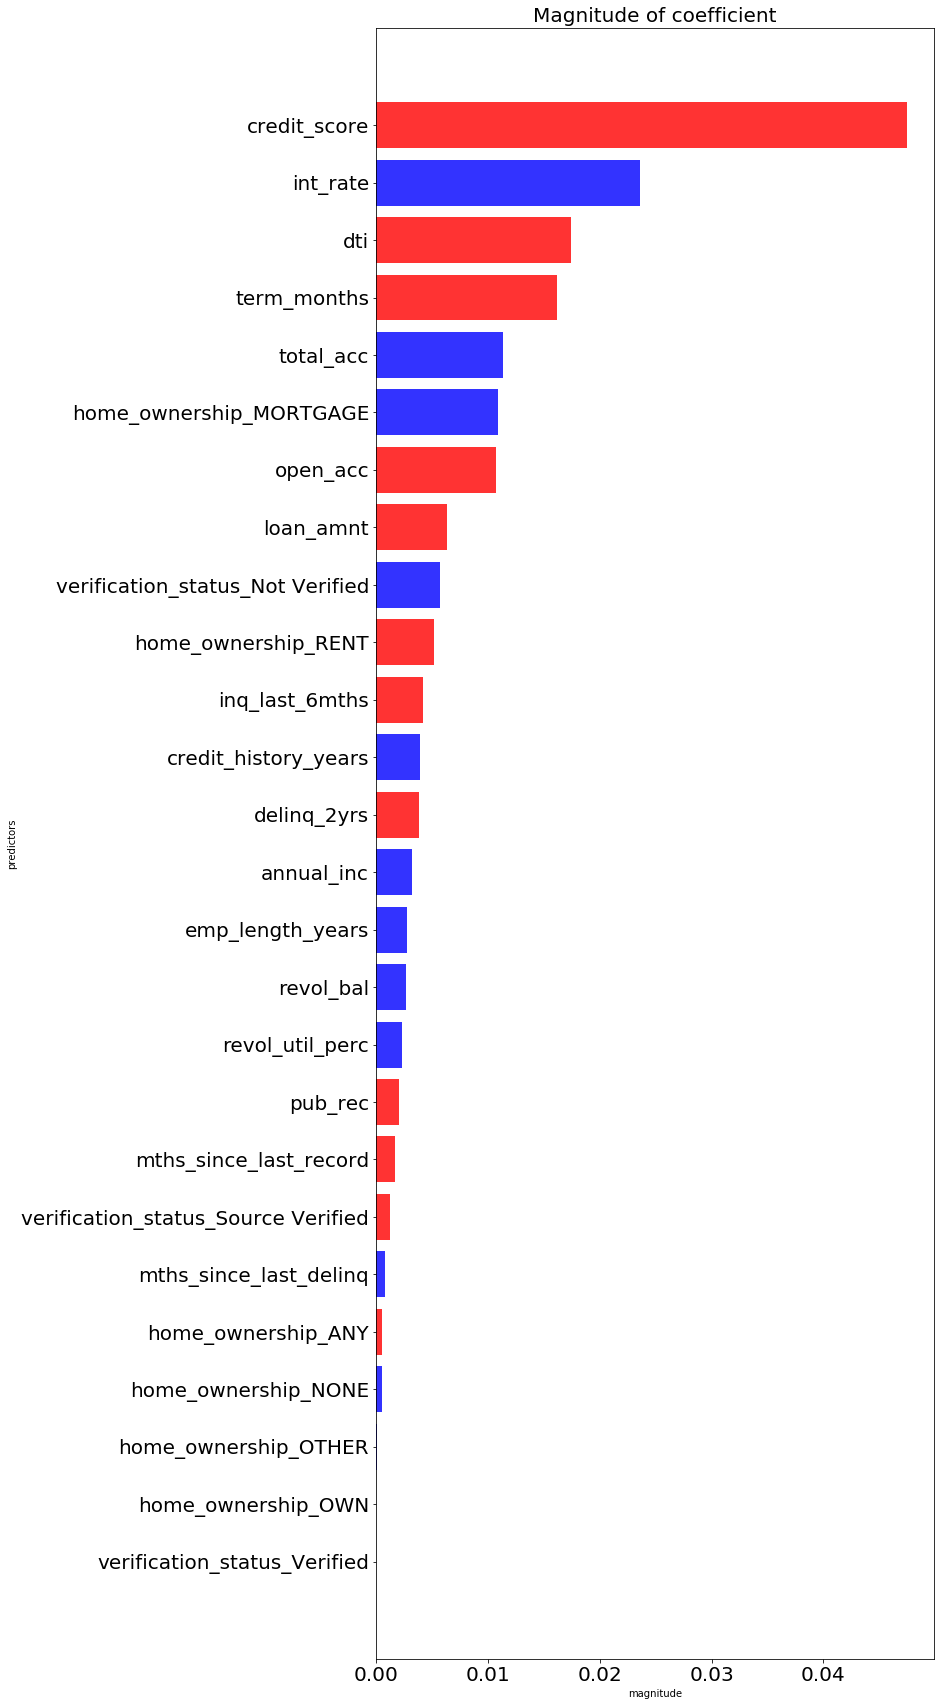

In [22]:
graph_coef(LassoCVobject, X_test_scale.columns)

# Define y_train_cat for classification

For simplicity, we want to predict all the loans than satisfy a minimum return.

In [23]:
y_train_cat = y_train > 0.05 #we can choose

In [24]:
y_test_cat = y_test > 0.05

In [25]:
X_train_scale

,loan_amnt,term_months,int_rate,credit_score,emp_length_years,annual_inc,dti,delinq_2yrs,credit_history_years,inq_last_6mths,...,total_acc,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,-0.978006,-0.561624,-0.400395,-0.284541,-1.462000,-0.570883,-0.426800,-0.360744,-0.226469,-0.713918,...,-1.359868,-0.654167,-0.779051,1.449006,-0.011455,-0.995315,-0.006579,-0.011689,-0.338276,1.226389
1,-1.094973,-0.561624,-1.720137,-1.669946,0.002234,-0.731813,0.740775,-0.360744,0.764932,-0.713918,...,-0.106119,1.528662,-0.779051,-0.690128,-0.011455,-0.995315,-0.006579,-0.011689,-0.338276,1.226389
2,-0.978006,-0.561624,-1.226575,-1.362078,-1.462000,-0.260287,-1.271030,-0.360744,-0.872877,-0.713918,...,-1.109118,-0.654167,-0.779051,1.449006,-0.011455,1.004707,-0.006579,-0.011689,-0.338276,-0.815402
3,-0.744073,-0.561624,-1.314558,-1.362078,1.145464,0.314235,-0.317632,0.787205,0.363904,-0.713918,...,1.314797,-0.654167,1.283612,-0.690128,-0.011455,1.004707,-0.006579,-0.011689,-0.338276,-0.815402
4,-0.817177,-0.561624,0.908618,1.100864,-1.462000,-0.842855,-1.339650,-0.360744,-1.319319,1.358606,...,-1.025535,-0.654167,-0.779051,1.449006,-0.011455,-0.995315,-0.006579,-0.011689,-0.338276,1.226389
5,-0.767467,-0.561624,-0.260910,-0.592409,-1.172282,0.314235,-0.749104,1.935153,0.888354,-0.713918,...,0.311798,1.528662,-0.779051,-0.690128,-0.011455,1.004707,-0.006579,-0.011689,-0.338276,-0.815402
6,-1.247029,-0.561624,-0.033442,0.177261,-0.303127,-0.474324,0.516202,3.083102,0.743324,0.322344,...,1.147631,-0.654167,-0.779051,1.449006,-0.011455,1.004707,-0.006579,-0.011689,-0.338276,-0.815402
7,0.659524,-0.561624,-0.202970,-0.130607,1.145464,0.153305,-1.012146,0.787205,-0.728213,0.322344,...,-0.106119,-0.654167,1.283612,-0.690128,-0.011455,1.004707,-0.006579,-0.011689,-0.338276,-0.815402
8,0.191658,-0.561624,0.069562,0.177261,-1.462000,-0.522604,-0.434077,0.787205,-0.449141,-0.713918,...,-0.691202,-0.654167,-0.779051,1.449006,-0.011455,1.004707,-0.006579,-0.011689,-0.338276,-0.815402
9,1.127390,1.780551,1.054540,0.946930,-0.592845,1.038423,0.421590,3.083102,0.653963,0.322344,...,2.150631,-0.654167,1.283612,-0.690128,-0.011455,-0.995315,-0.006579,-0.011689,-0.338276,1.226389


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression().fit(X_train_scale, y_train_cat)

In [27]:
model_logreg.score(X_train_scale, y_train_cat)

0.6897542369442603

In [28]:
model_logreg.score(X_test_scale, y_test_cat)

0.6896455178458392

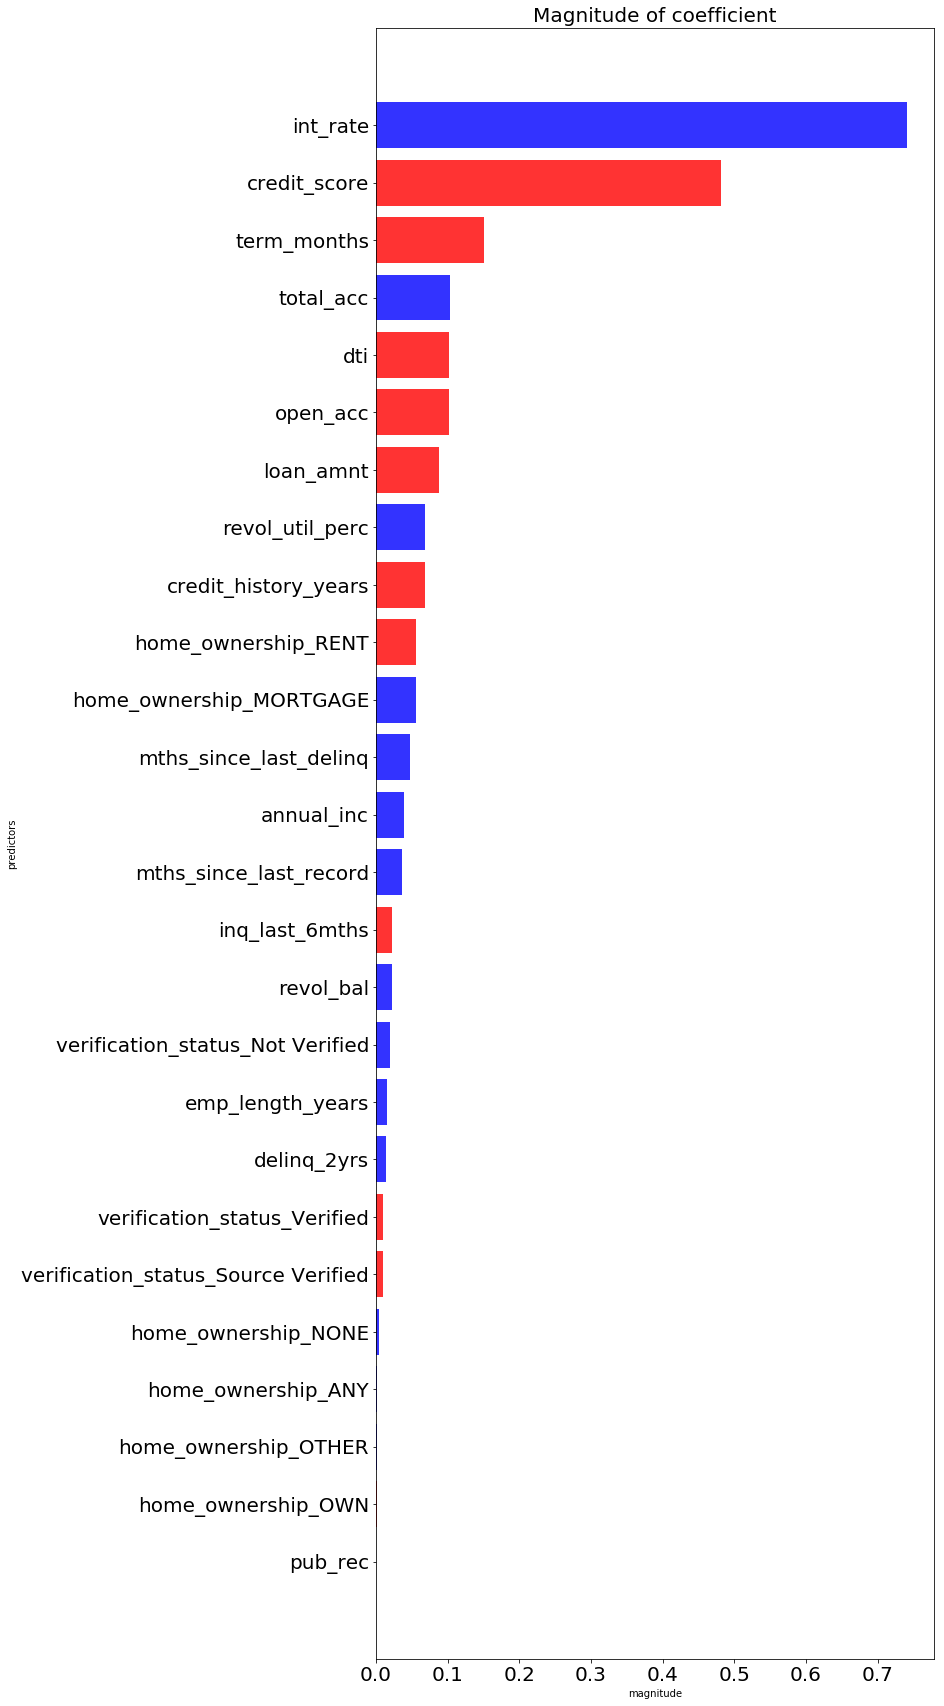

In [29]:
graph_coef(model_logreg, X_test_scale.columns)

## Strategy evaluate function for classification

The accuracy score on the model is not sufficient to determine it's quality. This is because a loan's loss can be up to 100%, whereas the gains are usually limited by the interest rate to 10-20%. Thus, a few bad loans can completely wipe out any profits from good loans. For example, if we choose 10 loans and 9 of them make 10%, but the last one is a total loss, then the overall perfomance will be negative. However, the accuracy will be 90%.

In [30]:
#
# for a model, evaluate it with the given "df" data and calculate a total profit/loss APY using
# the profit data.
#
# In the case of regression models, use "cutoff" to determine the investment criteria
#
def evaluate_strategy(model, df, profit, cutoff=None, showprint=True):
    # see where our model says to invest
    inv = model.predict(df)
    if cutoff is not None: 
        inv = inv > cutoff
        inv = inv.reshape(-1)
    # return the mean return
    if showprint:
        print("Positive result on %d out of %d (%0.2f%%)" % (inv.sum(), inv.shape[0], inv.sum() / inv.shape[0] * 100.0))
        print("Mean return of strategy:", profit[inv].mean())
        print("Overall return:", profit.mean())
    return profit[inv].mean(), profit.mean()

In [31]:
#
# for a model, evaluate it with the given "df" data and calculate a total profit/loss APY using
# the profit data.
#
# In the case of regression models, use "cutoff" to determine the investment criteria
#
def evaluate_strategy(model, df, profit, cutoff=None, showprint=True):
    # see where our model says to invest
    inv = model.predict(df)
    if cutoff is not None: 
        inv = inv > cutoff
        inv = inv.reshape(-1)
    # return the mean return
    if showprint:
        print("Positive result on %d out of %d (%0.2f%%)" % (inv.sum(), inv.shape[0], inv.sum() / inv.shape[0] * 100.0))
        print("Mean return of strategy:", profit[inv].mean())
        print("Overall return:", profit.mean())
        print("remaining", profit[~inv].mean())
    return profit[inv].mean(), profit.mean()

In [32]:
def evaluate_score(estimator, X, y):
    positive = model.predict_proba(df)[:,1] >= 0.9
    return profit[positive].mean()

In [33]:
#
# evaluate the strategy based on the probability estimates rather than the classification
# results
#
def evaluate_proba(model, df, profit, cutoff):
    positive = model.predict_proba(df)[:,1] >= cutoff
#     print(positive.shape)
    print("Percent positive investments %0.1f%%" % ((positive.sum() / profit.count()) * 100))
    print("Average return", profit[positive].mean())

In [34]:
evaluate_strategy(model_logreg, X_test_scale, y_test)

Positive result on 245375 out of 246444 (99.57%)
Mean return of strategy: -0.023810635287260434
Overall return: -0.023949942502153383
remaining -0.05592609578032883


(-0.023810635287260434, -0.023949942502153383)

In [77]:
x= model_logreg.predict(X_test_scale)

a =y_test>0
evaluate_strategy(model_logreg,X_test_scale,y_test)

y_test[x]

ss = pd.DataFrame(data=x)
ss['e'] = y_test.values

ss.columns = ['a', 'b']

ss[ss['a']==True].b.mean()

ss

newy = y_train_cat[:1000]
newy1 = y_train[:1000]

ma = LogisticRegression().fit(X_train[:1000],newy)
newy1[ma.predict(X_train[:1000])]
np.random.choice(y_test[~x],100).mean()

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train_cat,model_logreg.predict(X_train_scale)))
y_train_cat.where(model_logreg.predict(X_train_scale))
index = np.where(model_logreg.predict(X_train_scale)==True)[0]
# model_logreg.predict(X_train_scale).sum()

y_train.iloc[index].mean()

print(y_train.iloc[index].mean())
y_train.iloc[index].nsmallest(100)
np.abs(y_train.iloc[index])

print(np.sum(np.abs(y_train)<0.05)/len(y_train))
print(np.sum(y_train.iloc[index]<-0.30))
print(len(y_train))

Positive result on 245375 out of 246444 (99.57%)
Mean return of strategy: -0.023810635287260434
Overall return: -0.023949942502153383
remaining -0.05592609578032883
0.6897542369442603
-0.023756868317566113
0.12373770846577306
96545
739330


In [36]:
y_train.dtype

dtype('float64')

We will use this evaluate_strategy() function to determine if how well the strategy works. In the above example, the strategy returned -0.09 or about 9% loss, so it was not good. The overall return is the return from all the other loans and represents the "random" strategy. It returned -0.02, or a 2% loss, which is better than the model, but still not good.

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model_rf = RandomForestClassifier(max_depth=10, max_leaf_nodes=10)

In [39]:
model_rf.fit(X_train_scale, y_train>0.01)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
model_rf.score(X_train_scale, y_train>0.01)

0.8019815238121002

In [41]:
model_rf.score(X_test_scale, y_test_cat)

0.6910291993312883

In [42]:
evaluate_strategy(model_rf, X_test_scale, y_test)

Positive result on 246444 out of 246444 (100.00%)
Mean return of strategy: -0.023949942502153383
Overall return: -0.023949942502153383
remaining nan


(-0.023949942502153383, -0.023949942502153383)

In [43]:
y_test.iloc[model_rf.predict(X_test_scale)==False]
(model_rf.predict(X_test_scale)==False).sum()

0

## Random Forest using probability estimates

For this case, we evaluated the strategy using probability estimates. The code below creates a Random Forest and then chooses loans where the confidence in the prediction is very high. This results in a positive return over the test data set. This is a promising result.

In [44]:
model_rf_p = RandomForestClassifier(max_depth=10, max_leaf_nodes=10)
model_rf_p.fit(X_train_scale, y_train > 0.0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
evaluate_proba(model_rf_p, X_test_scale, y_test, 0.9)

Percent positive investments 0.0%
Average return nan


## Various Classifiers, loop through different target returns

One thing to consider is how the choice of our "target" return affects the model's accuracy. In other words, is the model better at predicting higher quality loans? The results below show that this is generally not the case. The graphs show that the best area of prediction is around a "target" return greater than 0. AdaBoost shows a peak at the end, so that requires more investigation, but it is probably spurious. Other than that, the models are unable to predict which loans will yield the highest returns. However, that's the very question we want to answer.

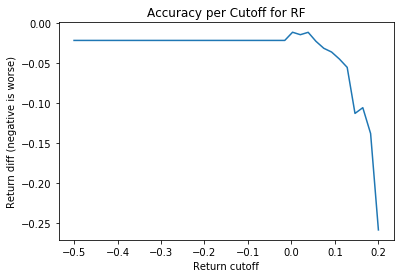

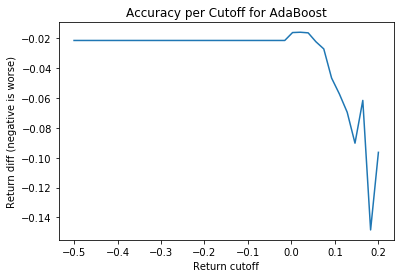

/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are col

/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are col

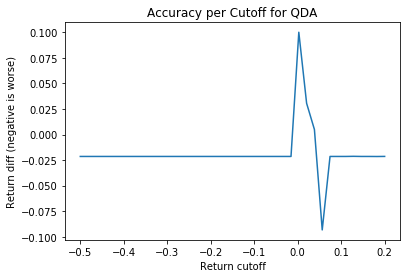

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

x = np.linspace(-0.50, 0.20, 40)

modelnames = ["RF", "AdaBoost", "QDA"]
models = [RandomForestClassifier(), AdaBoostClassifier(), QuadraticDiscriminantAnalysis()]

for name, model in zip(modelnames, models):
    y = []
    s = []
    for cutoff in x:
        positive = y_train_sub > cutoff
        model.fit(X_train_sub_scale, positive)
        score = accuracy_score(positive, model.predict(X_train_sub_scale))
        s.append(score)
        apy, mapy = evaluate_strategy(model, X_test_sub_scale, y_test_sub, cutoff, showprint=False)
        y.append(apy)
    plt.plot(x, y)
#     plt.plot(x, s)
    plt.xlabel("Return cutoff")
    plt.ylabel("Return diff (negative is worse)")
    plt.title("Accuracy per Cutoff for %s" % name)
    plt.show();

# Regression Models

Another area to consider is regression models for predicting the actual return. So far, we've worked with classification models to distinguish good loans from bad loans.
We will use sub sample of data.

## Random Forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor
model_rf_reg = RandomForestRegressor()
model_rf_reg.fit(X_train_sub_scale, y_train_sub)
evaluate_strategy(model_rf_reg, X_test_scale, y_test, 0.01)

Positive result on 106785 out of 246444 (43.33%)
Mean return of strategy: 0.0005673895921541428
Overall return: -0.023949942502153383
remaining -0.04269619807960085


(0.0005673895921541428, -0.023949942502153383)

In [48]:
evaluate_strategy(model_rf_reg, X_test_scale, y_test, 0.10)

Positive result on 11768 out of 246444 (4.78%)
Mean return of strategy: -0.01048387897865809
Overall return: -0.023949942502153383
remaining -0.024625208126011475


(-0.01048387897865809, -0.023949942502153383)

In [49]:
evaluate_strategy(model_rf_reg, X_test_scale, y_test, 0.20)

Positive result on 44 out of 246444 (0.02%)
Mean return of strategy: 0.059943427109245606
Overall return: -0.023949942502153383
remaining -0.023964923461012554


(0.059943427109245606, -0.023949942502153383)

## Ada Boost Regressor

As shown below, the AdaBoost regressor is unable to make any accurate predictions.

In [50]:
from sklearn.ensemble import AdaBoostRegressor
model_adaboost = AdaBoostRegressor()
model_adaboost.fit(X_train_sub_scale, y_train_sub)
evaluate_strategy(model_adaboost, X_test_scale, y_test, 0.01)

Positive result on 1017 out of 246444 (0.41%)
Mean return of strategy: -0.011285307098657703
Overall return: -0.023949942502153383
remaining -0.024002422197563288


(-0.011285307098657703, -0.023949942502153383)

## Ada Boost Classifier for high returns

The graph above showed that AdaBoost may have had good results for high returns. However, running over the entire train/test set shows abysmal perfomance.

In [51]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost2 = AdaBoostClassifier()
model_adaboost2.fit(X_train_sub_scale, y_train_sub > 0.20)
evaluate_strategy(model_adaboost2, X_test_scale, y_test)

Positive result on 2607 out of 246444 (1.06%)
Mean return of strategy: -0.10521975738512479
Overall return: -0.023949942502153383
remaining -0.023081040705461957


(-0.10521975738512479, -0.023949942502153383)

## Ada Boost Classifier with Random Forest base classifier

AdaBoost with Random Forest as base classifier takes a long time to run, so we try it with the small data set. The results are not promising.

In [52]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost3 = AdaBoostClassifier(
    learning_rate = 1,
    n_estimators=20,
    base_estimator=RandomForestClassifier(max_depth=15, max_leaf_nodes=15))
model_adaboost3.fit(X_train_sub_scale, y_train_sub > 0.10)
evaluate_strategy(model_adaboost3, X_test_sub_scale, y_test_sub)

Positive result on 654 out of 2500 (26.16%)
Mean return of strategy: -0.029647385090392175
Overall return: -0.02146721277172889
remaining -0.01856914522221321


(-0.029647385090392175, -0.02146721277172889)

As in the Random Forest, we will also consider predicting loan investments based on the probability. Only the highest probability results will be considered.

In [53]:
evaluate_proba(model_adaboost3, X_test_scale, y_test, 0.6)

Percent positive investments 0.0%
Average return nan


# Polynomial Features with subset of columns

So far, all the models have used the scaled data. Now we consider using polynomial features. For these tests, in order to keep runtimes reasonable, we will use a subset of the most promising features.

In [54]:
small_columns = ['loan_amnt','term_months','int_rate','credit_score',
                 'emp_length_years','annual_inc','dti','revol_util_perc']
X_train_small = X_train[small_columns]
X_test_small = X_test[small_columns]

In [55]:
from sklearn.preprocessing import PolynomialFeatures

scale.fit(X_train_small)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(scale.transform(X_train_small))
X_test_poly = poly.fit_transform(scale.transform(X_test_small))

y_train_target = y_train > 0.05
y_test_target = y_test > 0.05

In [56]:
from sklearn.linear_model import LogisticRegression
poly_logreg = LogisticRegression().fit(X_train_poly, y_train_target)

In [57]:
poly_logreg.score(X_train_poly, y_train_target)

0.7271367319059148

In [58]:
poly_logreg.score(X_test_poly, y_test_target)

0.7273660547629481

In [59]:
evaluate_strategy(poly_logreg, X_train_poly, y_train)

Positive result on 656189 out of 739330 (88.75%)
Mean return of strategy: -0.022489458771179967
Overall return: -0.023918428054797717
remaining -0.035196545051804605


(-0.022489458771179967, -0.023918428054797717)

In [60]:
evaluate_strategy(poly_logreg, X_test_poly, y_test)

Positive result on 218611 out of 246444 (88.71%)
Mean return of strategy: -0.022387062287078586
Overall return: -0.023949942502153383
remaining -0.036225399933899144


(-0.022387062287078586, -0.023949942502153383)

# Single DecisionTree

In [61]:
from sklearn.tree import DecisionTreeClassifier

decisionmodel = DecisionTreeClassifier(max_depth=3).fit(X_train_scale, y_train_cat)
evaluate_strategy(decisionmodel, X_test_scale, y_test)

Positive result on 217500 out of 246444 (88.26%)
Mean return of strategy: -0.02996264526775741
Overall return: -0.023949942502153383
remaining 0.021232577243523003


(-0.02996264526775741, -0.023949942502153383)

# LDA

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis().fit(X_train_scale, y_train > 0.10)
evaluate_strategy(lda_model, X_test_scale, y_test)

Positive result on 43665 out of 246444 (17.72%)
Mean return of strategy: -0.08914574747050502
Overall return: -0.023949942502153383
remaining -0.009911137576875466


/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(-0.08914574747050502, -0.023949942502153383)

# QDA

In [63]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_scale, y_train > 0.10)
evaluate_strategy(qda_model, X_test_scale, y_test)

/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Positive result on 78716 out of 246444 (31.94%)
Mean return of strategy: -0.06199690086671178
Overall return: -0.023949942502153383
remaining -0.00609422148583862


/Users/rogeriliffe/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(-0.06199690086671178, -0.023949942502153383)

In [64]:
evaluate_proba(qda_model, X_test_scale, y_test, 0.9)

Percent positive investments 7.8%
Average return -0.08139954065277541


## Neural Network

The Neural Network takes a long time to train, so we created a simple model to see if this is worth tweaking to improve perfomance.

In [65]:
y_nn = y_train > 0.05

from keras.models import Sequential
from keras.layers import Dense

model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.compile(loss='binary_crossentropy', optimizer='adam')
model_nn.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3456      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 14,065
Trainable params: 14,065
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_nn.fit(X_train_scale, y_nn, epochs=10, batch_size=128, validation_split=0.2)

Train on 591464 samples, validate on 147866 samples
Epoch 1/10
591464/591464 [==============================] - 8s 14us/step - loss: 0.5515 - val_loss: 0.5470
Epoch 2/10
591464/591464 [==============================] - 8s 13us/step - loss: 0.5448 - val_loss: 0.5459
Epoch 3/10
591464/591464 [==============================] - 8s 14us/step - loss: 0.5430 - val_loss: 0.5450
Epoch 4/10
591464/591464 [==============================] - 8s 14us/step - loss: 0.5420 - val_loss: 0.5427
Epoch 5/10
591464/591464 [==============================] - 8s 14us/step - loss: 0.5411 - val_loss: 0.5422
Epoch 6/10
591464/591464 [==============================] - 8s 13us/step - loss: 0.5403 - val_loss: 0.5421
Epoch 7/10
591464/591464 [==============================] - 8s 14us/step - loss: 0.5395 - val_loss: 0.5422
Epoch 8/10
591464/591464 [==============================] - 8s 14us/step - loss: 0.5390 - val_loss: 0.5433
Epoch 9/10
591464/591464 [==============================] - 8s 14us/step - loss: 0.5385 - va

The val_loss does not seem to be moving much so the model is not working well.

In [67]:
evaluate_strategy(model_nn, X_test_scale, y_test, 0.5)

Positive result on 211585 out of 246444 (85.86%)
Mean return of strategy: -0.02123804195563544
Overall return: -0.023949942502153383
remaining -0.0404104685394764


(-0.02123804195563544, -0.023949942502153383)

In [68]:
p = model_nn.predict_proba(X_test_scale)
p.min(), p.max()

(0.0, 0.9988053)

Even though the model does not seem to work well, if we only consider the loans where the probability score is higher than 0.9, the return is 0.05, which is much higher than most of the alternative models.

In [69]:
positive = model_nn.predict_proba(X_test_scale) >= 0.9
print("Percent positive investments %0.1f%%" % ((positive.sum() / y_test.count()) * 100))
print("Average return", y_test[positive.reshape(-1)].mean())

Percent positive investments 6.3%
Average return 0.046840585805957735


## Stacking Model

Next, we considered stacking models. First, we create a simple model with 3 base models: Logistic, Random Forest and Neural Network.

In [70]:
modellist = ['Logistic', 'RF', "NN"]
modelobj = [model_logreg, model_rf, model_nn]

# create empty results that we will fill in
z = np.zeros((X_train.shape[0], len(modellist)))
stack_train = pd.DataFrame(data=z, columns=modellist)
z = np.zeros((X_test.shape[0], len(modellist)))
stack_test = pd.DataFrame(data=z, columns=modellist)

In [71]:
#make dataset with prediction.
for name, model in zip(modellist, modelobj):
    stack_train[name] = model.predict_proba(X_train_scale)
    stack_test[name] = model.predict_proba(X_test_scale)

`stack_train` and `stack_test` have one row for each sample. The columns are the probability estimates of the models.

In [72]:
stack_train.head()

,Logistic,RF,NN
0,0.325929,0.164760,0.828567
1,0.407844,0.135459,0.042536
2,0.316926,0.124358,0.544525
3,0.313234,0.100118,0.598191
4,0.283544,0.218676,0.772149


In [73]:
stack_train.describe()

,Logistic,RF,NN
count,739330.000000,739330.000000,739330.000000
mean,0.309042,0.198137,0.691212
std,0.070130,0.074785,0.190744
min,0.001393,0.098424,0.000000
25%,0.260996,0.135437,0.605358
50%,0.307649,0.183158,0.741385
75%,0.355664,0.244574,0.828946
max,0.999950,0.413025,0.999198


In [74]:
stack_test.describe()

,Logistic,RF,NN
count,246444.000000,246444.000000,246444.000000
mean,0.309134,0.198503,0.690799
std,0.070187,0.074902,0.190969
min,0.001095,0.098424,0.000000
25%,0.261269,0.135669,0.605514
50%,0.307743,0.184029,0.741023
75%,0.355600,0.244692,0.828611
max,0.999846,0.413025,0.998805


We will aggregate these with the "min" function. Thus we are interested in the loans that all models agree are good. As shown below, that's 9% of all test loans and will yield a return of 0.02.

In [75]:
# positive = stack_test.mean(axis=1) > 0.5
# positive = (stack_test > 0.75).sum(axis=1) >= 3
positive = stack_test.min(axis=1) > 0.8
print("Percent positive investments %0.1f%%" % ((positive.sum() / y_test.count()) * 100))
print("Average return", y_test[positive.values].mean())

Percent positive investments 0.0%
Average return nan


## KNN

For the sake of completeness, we will also run a KNN classifier. But the results are not promising.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

KNN =KNeighborsClassifier(n_neighbors = 2).fit(X_train_sub_scale, y_train_sub > 0.10)
evaluate_strategy(KNN, X_test_sub_scale, y_test_sub)

Positive result on 312 out of 2500 (12.48%)
Mean return of strategy: -0.027277999524171637
Overall return: -0.02146721277172889
remaining -0.020638617951453702


(-0.027277999524171637, -0.02146721277172889)